In [1]:
# tried using code from https://github.com/imdeepmind/processed-imdb-wiki-dataset.git
# but didnt succeed

In [2]:
# download on https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

In [3]:
import pandas as pd
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
from IPython.display import display, HTML

In [4]:
# got from https://gist.github.com/victorkristof/b9d794fe1ed12e708b9d
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime.

    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    return datetime.fromordinal(int(datenum)) \
           + timedelta(days=int(days)) \
           + timedelta(hours=int(hours)) \
           + timedelta(minutes=int(minutes)) \
           + timedelta(seconds=round(seconds)) \
           - timedelta(days=366)

In [5]:
imdb_matdata = spio.loadmat('../datasets/imdb-wiki/imdb_crop/imdb.mat')
wiki_matdata = spio.loadmat('../datasets/imdb-wiki/wiki_crop/wiki.mat')

In [6]:
# Information got from IMDB-WIKI homepage

# Dataset Features:
#   dob: date of birth (Matlab serial date number)
#   photo_taken: year when the photo was taken
#   full_path: path to file
#   gender: 0 for female and 1 for male, NaN if unknown
#   name: name of the celebrity
#   face_location: location of the face. To crop the face in Matlab run
#   img(face_location(2):face_location(4),face_location(1):face_location(3),:))
#   face_score: detector score (the higher the better). Inf implies that no face was found in the image and the face_location then just returns the entire image
#   second_face_score: detector score of the face with the second highest score. This is useful to ignore images with more than one face. second_face_score is NaN if no second face was detected.
#   celeb_names (IMDB only): list of all celebrity names
#   celeb_id (IMDB only): index of celebrity name
#
# The age of a person can be calculated based on the date of birth and 
# the time when the photo was taken (note that we assume that the photo was 
# taken in the middle of the year):
#   [age,~]=datevec(datenum(wiki.photo_taken,7,1)-wiki.dob); 

In [7]:
attributes_names_idx = {
    'dob': 0,
    'photo_taken': 1,
    'full_path': 2,
    'gender': 3,
    'name': 4,
    'face_location': 5,
    'face_score': 6,
    'second_face_score': 7,
    'celeb_names': 8,
    'celeb_id': 9,
}

wanted_attributes_names = [
    'dob',
    'photo_taken',
    'full_path',
    'gender',
    'name',
]

to_datetime = lambda d: datetime.fromordinal(d) + timedelta(days=d%1) - timedelta(days=366)

wanted_attributes_transform = {
    'dob': lambda x: int(to_datetime(int(x)).strftime('%Y')),
    'photo_taken': lambda x: int(x),
    'full_path': lambda x: x[0],
    'gender': lambda x: 'M' if x == 1.0 else 'F' if x == 0.0 else 'U',
    'name': lambda x: x[0] if len(x) > 0 else '[UNKNOWN]',
}

In [8]:
imdb_matdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'imdb'])

In [9]:
imdb_np_data = imdb_matdata['imdb']
imdb_np_data

array([[(array([[693726, 693726, 693726, ..., 726831, 726831, 726831]], dtype=int32), array([[1968, 1970, 1968, ..., 2011, 2011, 2011]], dtype=uint16), array([[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
                array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
                array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
                ...,
                array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44'),
                array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44'),
                array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]],
              dtype=object), array([[1., 1., 1., ..., 0., 0., 0.]]), array([[array(['Fred Astaire'], dtype='<U12'),
                array(['Fred Astaire'], dtype='<U12'),
                array(['Fred Astaire'], dtype='<U12'), ...,
                array(['Jane Levy'], dtype='<U9'),
                array(['Jane Le

In [10]:
imdb_np_data.dtype

dtype([('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O'), ('celeb_names', 'O'), ('celeb_id', 'O')])

In [11]:
imdb_info_layer = [ set() ] * 4

for l0 in imdb_np_data:
    imdb_info_layer[0].add(f'type: {l0.dtype}, len: {len(l0)}')
    for l1 in l0:
        imdb_info_layer[1].add(f'type: {l1.dtype}, len: {len(l1)}')
        for l2 in l1:
            imdb_info_layer[2].add(f'type: {l2.dtype}, len: {len(l2)}')
            for l3 in l2:
                imdb_info_layer[3].add(f'type: {l3.dtype}, len: {len(l3)}')

for i in range(4):
    print(f'Structure on depth {i+1}:')
    for info in imdb_info_layer[i]:
        print(f'\t{info}')

Structure on depth 1:
	type: int32, len: 460723
	type: object, len: 460723
	type: object, len: 20284
	type: uint16, len: 460723
	type: int32, len: 1
	type: object, len: 1
	type: float64, len: 1
	type: [('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O'), ('celeb_names', 'O'), ('celeb_id', 'O')], len: 10
	type: [('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O'), ('celeb_names', 'O'), ('celeb_id', 'O')], len: 1
	type: float64, len: 460723
	type: uint16, len: 1
Structure on depth 2:
	type: int32, len: 460723
	type: object, len: 460723
	type: object, len: 20284
	type: uint16, len: 460723
	type: int32, len: 1
	type: object, len: 1
	type: float64, len: 1
	type: [('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('fac

In [12]:
for i in range(10):
    print(f'Feature {i}:')
    print(f'\t type: {imdb_np_data[0][0][i][0][0].dtype}')
    print(f'\t len: {len(imdb_np_data[0][0][i][0])}')
    print(f'\t sample: {imdb_np_data[0][0][i][0][0]}')

Feature 0:
	 type: int32
	 len: 460723
	 sample: 693726
Feature 1:
	 type: uint16
	 len: 460723
	 sample: 1968
Feature 2:
	 type: <U43
	 len: 460723
	 sample: ['01/nm0000001_rm124825600_1899-5-10_1968.jpg']
Feature 3:
	 type: float64
	 len: 460723
	 sample: 1.0
Feature 4:
	 type: <U12
	 len: 460723
	 sample: ['Fred Astaire']
Feature 5:
	 type: float64
	 len: 460723
	 sample: [[1072.926  161.838 1214.784  303.696]]
Feature 6:
	 type: float64
	 len: 460723
	 sample: 1.4596929136202572
Feature 7:
	 type: float64
	 len: 460723
	 sample: 1.1189733571573068
Feature 8:
	 type: <U21
	 len: 20284
	 sample: ["'Lee' George Quinones"]
Feature 9:
	 type: uint16
	 len: 460723
	 sample: 6488


In [37]:
imdb_extracted_data = []

for i in range(len(imdb_np_data[0][0][0][0])):
    data = dict()
    try:
        for att_name in wanted_attributes_names:
            att_idx = attributes_names_idx[att_name]
            raw_data = imdb_np_data[0][0][att_idx][0][i]
            data[att_name] = wanted_attributes_transform[att_name](raw_data)
        data['age'] = data['photo_taken'] - data['dob']
        data['full_path'] = f"imdb_crop/{data['full_path']}"
        if data['age'] < 0 or data['age'] > 100:
            raise Exception(f'Invalid age value {data["age"]}')
        imdb_extracted_data.append(data)    
    except Exception as e:
        print(f'Error when processing attribute {att_name} with value {raw_data}. Error: {e}')

Error when processing attribute name with value ['Akira Kurosawa']. Error: Invalid age value 101
Error when processing attribute name with value ['Milla Jovovich']. Error: Invalid age value -12
Error when processing attribute name with value ['Milla Jovovich']. Error: Invalid age value -12
Error when processing attribute name with value ['Milla Jovovich']. Error: Invalid age value -12
Error when processing attribute name with value ['Uma Thurman']. Error: Invalid age value -6
Error when processing attribute name with value ['Uma Thurman']. Error: Invalid age value -6
Error when processing attribute name with value ['Uma Thurman']. Error: Invalid age value -6
Error when processing attribute name with value ['Uma Thurman']. Error: Invalid age value -6
Error when processing attribute name with value ['Uma Thurman']. Error: Invalid age value -6
Error when processing attribute name with value ['Uma Thurman']. Error: Invalid age value -6
Error when processing attribute name with value ['Uma 

Error when processing attribute name with value ['Rosario Dawson']. Error: Invalid age value -16
Error when processing attribute name with value ['Rosario Dawson']. Error: Invalid age value -16
Error when processing attribute name with value ['Rosario Dawson']. Error: Invalid age value -16
Error when processing attribute name with value ['Charlie Day']. Error: Invalid age value -1
Error when processing attribute name with value ['Charlie Day']. Error: Invalid age value -1
Error when processing attribute name with value ['Charlie Day']. Error: Invalid age value -1
Error when processing attribute name with value ['Charlie Day']. Error: Invalid age value -1
Error when processing attribute name with value ['Charlie Day']. Error: Invalid age value -1
Error when processing attribute name with value ['Charlie Day']. Error: Invalid age value -1
Error when processing attribute name with value ['Charlie Day']. Error: Invalid age value -1
Error when processing attribute name with value ['Charlie 

Error when processing attribute dob with value 75. Error: date value out of range
Error when processing attribute dob with value 75. Error: date value out of range
Error when processing attribute name with value ['Lois Weber']. Error: Invalid age value 131
Error when processing attribute name with value ['Morey Amsterdam']. Error: Invalid age value 101
Error when processing attribute name with value ['Melissa Archer']. Error: Invalid age value -11
Error when processing attribute name with value ['Melissa Archer']. Error: Invalid age value -11
Error when processing attribute name with value ['Melissa Archer']. Error: Invalid age value -11
Error when processing attribute name with value ['Melissa Archer']. Error: Invalid age value -11
Error when processing attribute name with value ['Zooey Deschanel']. Error: Invalid age value -5
Error when processing attribute name with value ['Zooey Deschanel']. Error: Invalid age value -5
Error when processing attribute dob with value 364. Error: date

Error when processing attribute name with value ['Dita Von Teese']. Error: Invalid age value -9
Error when processing attribute name with value ['Nasim Pedrad']. Error: Invalid age value -6
Error when processing attribute name with value ['Nasim Pedrad']. Error: Invalid age value -6
Error when processing attribute name with value ['Nasim Pedrad']. Error: Invalid age value -6
Error when processing attribute name with value ['Nasim Pedrad']. Error: Invalid age value -6
Error when processing attribute name with value ['Nasim Pedrad']. Error: Invalid age value -6
Error when processing attribute name with value ['Nasim Pedrad']. Error: Invalid age value -6
Error when processing attribute name with value ['Nasim Pedrad']. Error: Invalid age value -6
Error when processing attribute name with value ['Nasim Pedrad']. Error: Invalid age value -6
Error when processing attribute name with value ['Nasim Pedrad']. Error: Invalid age value -6
Error when processing attribute name with value ['Nasim Pe

Error when processing attribute dob with value 345. Error: date value out of range
Error when processing attribute dob with value 345. Error: date value out of range
Error when processing attribute dob with value 345. Error: date value out of range
Error when processing attribute dob with value 345. Error: date value out of range
Error when processing attribute dob with value 345. Error: date value out of range
Error when processing attribute dob with value 345. Error: date value out of range
Error when processing attribute name with value ['Daryl Sabara']. Error: Invalid age value -10
Error when processing attribute name with value ['Anneke Kim Sarnau']. Error: Invalid age value -1
Error when processing attribute name with value ['Anneke Kim Sarnau']. Error: Invalid age value -1
Error when processing attribute name with value ['James Blunt']. Error: Invalid age value -5
Error when processing attribute name with value ['James Blunt']. Error: Invalid age value -5
Error when processing a

Error when processing attribute name with value ['Lady Gaga']. Error: Invalid age value -15
Error when processing attribute name with value ['Lady Gaga']. Error: Invalid age value -15
Error when processing attribute name with value ['Lady Gaga']. Error: Invalid age value -15
Error when processing attribute name with value ['Lady Gaga']. Error: Invalid age value -15
Error when processing attribute name with value ['Lady Gaga']. Error: Invalid age value -11
Error when processing attribute name with value ['Lady Gaga']. Error: Invalid age value -11
Error when processing attribute name with value ['Lady Gaga']. Error: Invalid age value -11
Error when processing attribute name with value ['Lady Gaga']. Error: Invalid age value -11
Error when processing attribute name with value ['Lady Gaga']. Error: Invalid age value -11
Error when processing attribute name with value ['Lady Gaga']. Error: Invalid age value -11
Error when processing attribute dob with value 352. Error: date value out of ran

Error when processing attribute name with value ['Martha Madison']. Error: Invalid age value -12
Error when processing attribute name with value ['Martha Madison']. Error: Invalid age value -12
Error when processing attribute name with value ['Martha Madison']. Error: Invalid age value -12
Error when processing attribute name with value ['James Franco']. Error: Invalid age value -3
Error when processing attribute name with value ['James Franco']. Error: Invalid age value -3
Error when processing attribute name with value ['James Franco']. Error: Invalid age value -3
Error when processing attribute name with value ['James Franco']. Error: Invalid age value -15
Error when processing attribute name with value ['James Franco']. Error: Invalid age value -15
Error when processing attribute name with value ['James Franco']. Error: Invalid age value -15
Error when processing attribute name with value ['David Fumero']. Error: Invalid age value -4
Error when processing attribute name with value 

In [14]:
len(imdb_extracted_data)

460070

In [15]:
imdb_extracted_data[0]

{'dob': 1899,
 'photo_taken': 1968,
 'full_path': '01/nm0000001_rm124825600_1899-5-10_1968.jpg',
 'gender': 'M',
 'name': 'Fred Astaire',
 'age': 69}

In [16]:
wiki_matdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'wiki'])

In [17]:
wiki_np_data = wiki_matdata['wiki']
wiki_np_data

array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
              dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                array(['Dettmar Cramer'], dtype='<U14'),
                array(['Marc Okrand'], dtype='<U11'), ...,
                array(['Michael Wiesinger'], dtype='<U17'),
                array(['Johann Grugger'], dtype='<U14'),
                array(['Greta Van Susteren'], dtype='<U18')

In [18]:
wiki_np_data.dtype

dtype([('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O')])

In [19]:
wiki_info_layer = [ set() ] * 4

for l0 in wiki_np_data:
    wiki_info_layer[0].add(f'type: {type(l0)}, len: {len(l0)}')
    for l1 in l0:
        wiki_info_layer[1].add(f'type: {type(l1)}, len: {len(l1)}')
        for l2 in l1:
            wiki_info_layer[2].add(f'type: {type(l2)}, len: {len(l2)}')
            for l3 in l2:
                wiki_info_layer[3].add(f'type: {type(l3)}, len: {len(l3)}')

for i in range(4):
    print(f'Structure on depth {i+1}:')
    for info in wiki_info_layer[i]:
        print(f'\t{info}')

Structure on depth 1:
	type: <class 'numpy.void'>, len: 8
	type: <class 'numpy.ndarray'>, len: 1
	type: <class 'numpy.ndarray'>, len: 62328
Structure on depth 2:
	type: <class 'numpy.void'>, len: 8
	type: <class 'numpy.ndarray'>, len: 1
	type: <class 'numpy.ndarray'>, len: 62328
Structure on depth 3:
	type: <class 'numpy.void'>, len: 8
	type: <class 'numpy.ndarray'>, len: 1
	type: <class 'numpy.ndarray'>, len: 62328
Structure on depth 4:
	type: <class 'numpy.void'>, len: 8
	type: <class 'numpy.ndarray'>, len: 1
	type: <class 'numpy.ndarray'>, len: 62328


In [20]:
for i in range(8):
    print(f'Feature {i}:')
    print(f'\t type: {type(wiki_np_data[0][0][i][0][0])}')
    print(f'\t len: {len(wiki_np_data[0][0][i][0])}')
    print(f'\t sample: {wiki_np_data[0][0][i][0][0]}')

Feature 0:
	 type: <class 'numpy.int32'>
	 len: 62328
	 sample: 723671
Feature 1:
	 type: <class 'numpy.uint16'>
	 len: 62328
	 sample: 2009
Feature 2:
	 type: <class 'numpy.ndarray'>
	 len: 62328
	 sample: ['17/10000217_1981-05-05_2009.jpg']
Feature 3:
	 type: <class 'numpy.float64'>
	 len: 62328
	 sample: 1.0
Feature 4:
	 type: <class 'numpy.ndarray'>
	 len: 62328
	 sample: ['Sami Jauhojärvi']
Feature 5:
	 type: <class 'numpy.ndarray'>
	 len: 62328
	 sample: [[111.29109473 111.29109473 252.66993082 252.66993082]]
Feature 6:
	 type: <class 'numpy.float64'>
	 len: 62328
	 sample: 4.3009623883308095
Feature 7:
	 type: <class 'numpy.float64'>
	 len: 62328
	 sample: nan


In [38]:
wiki_extracted_data = []

for i in range(len(wiki_np_data[0][0][0][0])):
    data = dict()
    try:
        for att_name in wanted_attributes_names:
            att_idx = attributes_names_idx[att_name]
            raw_data = wiki_np_data[0][0][att_idx][0][i]
            data[att_name] = wanted_attributes_transform[att_name](raw_data)
        data['age'] = data['photo_taken'] - data['dob']
        data['full_path'] = f"wiki_crop/{data['full_path']}"
        if data['age'] < 0 or data['age'] > 100:
            raise Exception(f'Invalid age value {data["age"]}')
        wiki_extracted_data.append(data)    
    except Exception as e:
        print(f'Error when processing attribute {att_name} with value {raw_data}. Error: {e}')

Error when processing attribute name with value ['Sam Hoare']. Error: Invalid age value -6
Error when processing attribute name with value ['Ken Breitenbach']. Error: Invalid age value -5
Error when processing attribute name with value ['Mike Byers']. Error: Invalid age value -6
Error when processing attribute name with value ['Paul Brydges']. Error: Invalid age value -5
Error when processing attribute name with value ['Mike Boland']. Error: Invalid age value -4
Error when processing attribute name with value ['Larry Carriere']. Error: Invalid age value -2
Error when processing attribute name with value ['Rob Conn']. Error: Invalid age value -8
Error when processing attribute name with value ['Gord Donnelly']. Error: Invalid age value -2
Error when processing attribute name with value ['Josemaría Escrivá']. Error: Invalid age value 101
Error when processing attribute name with value ['Steve Dykstra']. Error: Invalid age value -2
Error when processing attribute name with value ['Chris E

Error when processing attribute name with value ['Andreas Murray']. Error: Invalid age value 316
Error when processing attribute name with value ['Gilbert Delorme']. Error: Invalid age value -2
Error when processing attribute name with value ['Brent Severyn']. Error: Invalid age value -6
Error when processing attribute name with value ['Charles Shambaugh']. Error: Invalid age value 175
Error when processing attribute name with value ['Frank Dobson']. Error: Invalid age value 115
Error when processing attribute name with value ['Marc Moro']. Error: Invalid age value -7
Error when processing attribute name with value ['Jamie Allison']. Error: Invalid age value -5
Error when processing attribute name with value ['Dylan Hunter']. Error: Invalid age value -5
Error when processing attribute name with value ['Frank Kell']. Error: Invalid age value 121
Error when processing attribute name with value ['John Glover']. Error: Invalid age value -3
Error when processing attribute name with value ['

Error when processing attribute name with value ['Bruce Eakin']. Error: Invalid age value -2
Error when processing attribute name with value ['Zac Boyer']. Error: Invalid age value -1
Error when processing attribute name with value ['Vic Mercredi']. Error: Invalid age value -3
Error when processing attribute name with value ['Ferdinand David']. Error: Invalid age value 180
Error when processing attribute name with value ['Jeff Szwez']. Error: Invalid age value -1
Error when processing attribute name with value ['Donald Morgan']. Error: Invalid age value 123
Error when processing attribute name with value ['Rick Fraser']. Error: Invalid age value -4
Error when processing attribute name with value ['Alan Globensky']. Error: Invalid age value -1
Error when processing attribute name with value ['Rich Gosselin']. Error: Invalid age value -6
Error when processing attribute name with value ['Keiller Greig']. Error: Invalid age value 123
Error when processing attribute name with value ['Paul H

Error when processing attribute name with value ['Thomas P. Wheelock']. Error: Invalid age value 191
Error when processing attribute name with value ['Michihiro Ishibashi']. Error: Invalid age value -5
Error when processing attribute name with value ['Stefan Cherneski']. Error: Invalid age value -8
Error when processing attribute name with value ['Susannah Lattin']. Error: Invalid age value 154
Error when processing attribute name with value ['Al Blanchard']. Error: Invalid age value -2
Error when processing attribute name with value ['Evelyn Roberts']. Error: Invalid age value 118
Error when processing attribute name with value ['Sylvain Cloutier']. Error: Invalid age value -4
Error when processing attribute name with value ['Harry Ferguson']. Error: Invalid age value 124
Error when processing attribute name with value ['Marty Ruff']. Error: Invalid age value -3
Error when processing attribute name with value ['Joseph Arthur Lortie']. Error: Invalid age value 135
Error when processing

Error when processing attribute name with value ['Michael van Vuuren']. Error: Invalid age value -1
Error when processing attribute name with value ['Tragedy Khadafi']. Error: Invalid age value -20
Error when processing attribute name with value ['Mosaddek Hossain']. Error: Invalid age value -12
Error when processing attribute name with value ['Marion Fresenius Fooshee']. Error: Invalid age value 118
Error when processing attribute name with value ['Henry Ludwell Moore']. Error: Invalid age value 136
Error when processing attribute name with value ['T. J. Caig']. Error: Invalid age value -1
Error when processing attribute name with value ['Nathan Barrett']. Error: Invalid age value -1
Error when processing attribute name with value ['Cole Byers']. Error: Invalid age value -3
Error when processing attribute name with value ['Ernie Godden']. Error: Invalid age value -1
Error when processing attribute name with value ['Andy Johnson']. Error: Invalid age value -14
Error when processing att

Error when processing attribute name with value ['Robert Mulholland']. Error: Invalid age value 171
Error when processing attribute name with value ['Rick Boh']. Error: Invalid age value -4
Error when processing attribute name with value ['Brent Hughes']. Error: Invalid age value -3
Error when processing attribute name with value ['Gerry Minor']. Error: Invalid age value -8
Error when processing attribute name with value ['Tim Bothwell']. Error: Invalid age value -5
Error when processing attribute name with value ['Randy Boyd']. Error: Invalid age value -2
Error when processing attribute name with value ['Norman Mitchell']. Error: Invalid age value 104
Error when processing attribute name with value ['Frederick Chapman']. Error: Invalid age value 103
Error when processing attribute name with value ['John Olver']. Error: Invalid age value -8
Error when processing attribute name with value ['Henry Thomas Windsor']. Error: Invalid age value 214
Error when processing attribute name with va

Error when processing attribute name with value ['Eddie Tryon']. Error: Invalid age value 104
Error when processing attribute name with value ['A. J. Davis']. Error: Invalid age value -6
Error when processing attribute name with value ['David Kyles']. Error: Invalid age value -28
Error when processing attribute name with value ['Walter Koerner']. Error: Invalid age value 111
Error when processing attribute name with value ['Sean Shanahan']. Error: Invalid age value -1
Error when processing attribute name with value ['Connor James']. Error: Invalid age value -2
Error when processing attribute name with value ['S. Marsh Johnson']. Error: Invalid age value 108
Error when processing attribute name with value ['Jean-Guy Trudel']. Error: Invalid age value -5
Error when processing attribute name with value ['Barry Potomski']. Error: Invalid age value -2
Error when processing attribute name with value ['Rene Chapdelaine']. Error: Invalid age value -6
Error when processing attribute name with v

Error when processing attribute name with value ['Marc Lefebvre']. Error: Invalid age value -2
Error when processing attribute name with value ['Andrew Dale']. Error: Invalid age value -6
Error when processing attribute name with value ['Eric Fernihough']. Error: Invalid age value 107
Error when processing attribute name with value ['Tony Ford']. Error: Invalid age value -15
Error when processing attribute name with value ['Hunter Vogel']. Error: Invalid age value 110
Error when processing attribute name with value ['Jonathan Williams']. Error: Invalid age value -6
Error when processing attribute name with value ['Iris du Pré']. Error: Invalid age value 101
Error when processing attribute name with value ['Mario Faubert']. Error: Invalid age value -4
Error when processing attribute name with value ['Ron Huston']. Error: Invalid age value -5
Error when processing attribute name with value ['Brian Lavender']. Error: Invalid age value -7
Error when processing attribute name with value ['R

In [39]:
df = pd.DataFrame(imdb_extracted_data + wiki_extracted_data)
df.head()

,dob,photo_taken,full_path,gender,name,age
0,1899,1968,imdb_crop/01/nm0000001_rm124825600_1899-5-10_1...,M,Fred Astaire,69
1,1899,1970,imdb_crop/01/nm0000001_rm3343756032_1899-5-10_...,M,Fred Astaire,71
2,1899,1968,imdb_crop/01/nm0000001_rm577153792_1899-5-10_1...,M,Fred Astaire,69
3,1899,1968,imdb_crop/01/nm0000001_rm946909184_1899-5-10_1...,M,Fred Astaire,69
4,1899,1968,imdb_crop/01/nm0000001_rm980463616_1899-5-10_1...,M,Fred Astaire,69


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520700 entries, 0 to 520699
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   dob          520700 non-null  int64 
 1   photo_taken  520700 non-null  int64 
 2   full_path    520700 non-null  object
 3   gender       520700 non-null  object
 4   name         520700 non-null  object
 5   age          520700 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 23.8+ MB


In [41]:
df['age'].value_counts().sort_index()

0      229
1       87
2      233
3       89
4       76
      ... 
96      32
97      30
98      16
99      23
100     44
Name: age, Length: 101, dtype: int64

<AxesSubplot:>

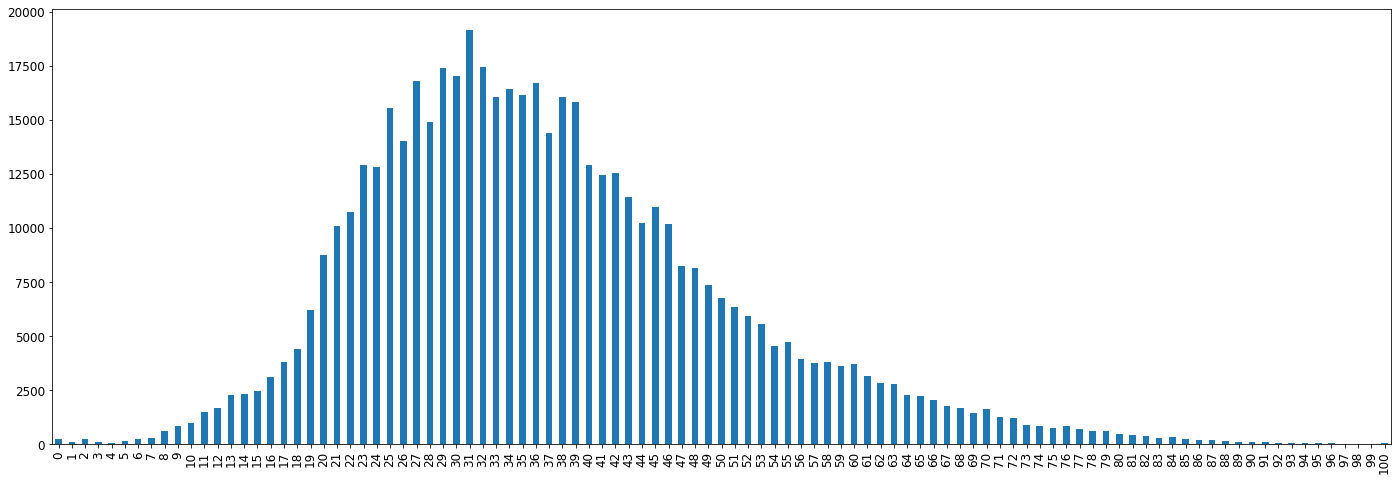

In [42]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [43]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [44]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  4.02%


In [54]:
samples = df.sample(n=18)
samples.head()

,dob,photo_taken,full_path,gender,name,age
441462,1982,2010,imdb_crop/60/nm1192060_rm1352973056_1982-4-30_...,M,Drew Seeley,28
363148,1980,2005,imdb_crop/24/nm2162024_rm790267648_1980-1-17_2...,M,Maksim Chmerkovskiy,25
115910,1969,2013,imdb_crop/23/nm0001523_rm1868881664_1969-12-14...,F,Natascha McElhone,44
92237,1968,2011,imdb_crop/29/nm0001029_rm1275373568_1968-9-26_...,M,Jim Caviezel,43
90346,1968,2007,imdb_crop/82/nm0000982_rm2312804608_1968-2-12_...,M,Josh Brolin,39


In [55]:
def display_image_grid(df, n_rows, n_cols):
    """
    Displays a grid of images in a Jupyter Notebook using ImageGrid.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing image paths.
    n_cols (int): Number of columns in the grid.
    """
    fig = plt.figure(figsize=(n_cols * 3, n_rows * 3))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # create grid of axes
                     axes_pad=0.0,  # pad between axes in inches
                     )

    img_size=(300, 325)
    
    for ax, image_path in zip(grid, df['full_path']):
        image = Image.open(f'../datasets/imdb-wiki/{image_path}').convert('RGB')
        image = image.resize(img_size, Image.ANTIALIAS)  # Resize image
        ax.imshow(image, cmap=None, interpolation='nearest')
        ax.axis('off')  # Turn off axis
    
    plt.show()

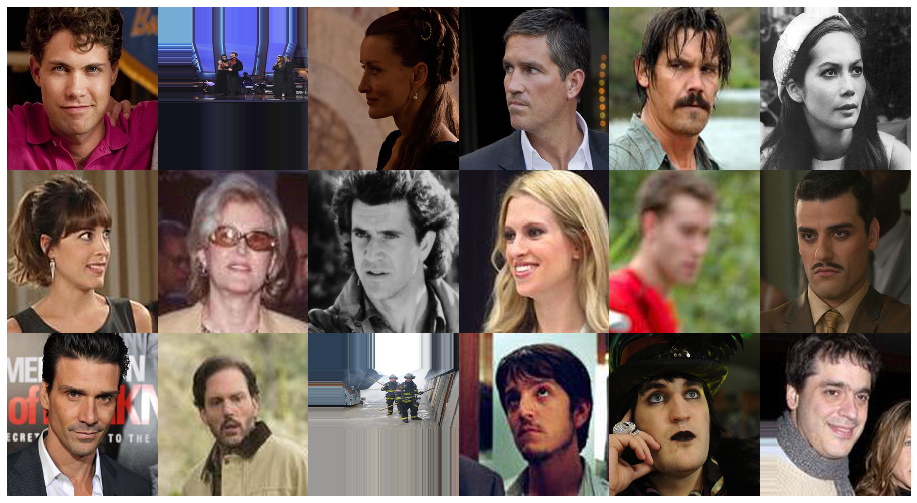

In [56]:
display_image_grid(samples, n_rows=3, n_cols=6)